<a href="https://colab.research.google.com/github/SathvikaBandi14/Image-Processing-Using-Verilog/blob/main/AccentClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOUNTING GOOGLE DRIVE

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
audio_folder = "/content/drive/MyDrive/ASP IEEE project/allaudio"
# List audio files
files = os.listdir(audio_folder)
print("Audio Files in Folder:", files)

Audio Files in Folder: ['mandarin7.wav', 'mandarin8.wav', 'mandarin10.wav', 'mandarin3.wav', 'mandarin9.wav', 'mandarin12.wav', 'mandarin63.wav', 'mandarin19.wav', 'mandarin40.wav', 'mandarin67.wav', 'mandarin58.wav', 'mandarin29.wav', 'mandarin48.wav', 'mandarin50.wav', 'mandarin44.wav', 'mandarin14.wav', 'mandarin17.wav', 'mandarin33.wav', 'mandarin51.wav', 'mandarin16.wav', 'mandarin13.wav', 'mandarin49.wav', 'mandarin57.wav', 'mandarin27.wav', 'mandarin30.wav', 'mandarin62.wav', 'mandarin68.wav', 'mandarin28.wav', 'mandarin90.wav', 'mandarin117.wav', 'mandarin91.wav', 'mandarin80.wav', 'mandarin131.wav', 'mandarin76.wav', 'mandarin123.wav', 'mandarin122.wav', 'mandarin113.wav', 'mandarin116.wav', 'mandarin75.wav', 'mandarin127.wav', 'mandarin126.wav', 'mandarin69.wav', 'mandarin120.wav', 'mandarin89.wav', 'mandarin115.wav', 'mandarin112.wav', 'mandarin94.wav', 'mandarin88.wav', 'mandarin74.wav', 'mandarin135.wav', 'mandarin144.wav', 'mandarin139.wav', 'mandarin134.wav', 'mandarin15

## VISUALISING THE AUDIO

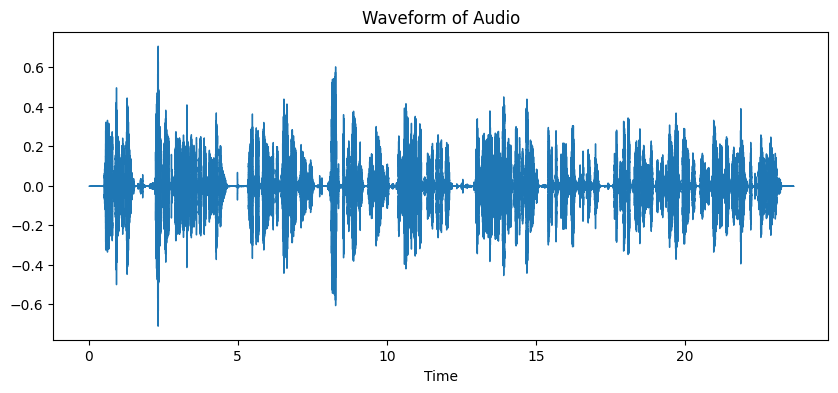

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
#from pydub import AudioSegment

# Select an audio file (replace with your actual file name)
file_name = "english73.wav"
audio_path = os.path.join(audio_folder, file_name)

# Load audio using Librosa
y, sr = librosa.load(audio_path, sr=None)

# Display waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Audio')
plt.show()

## MFCC (Mel-Frequency Cepstral Coefficients) —
Speech DNA
A compressed version of Mel Spectrogram that focuses on how humans hear.

Inspired by how our ears work!

MFCC simplifies audio by picking out the most important frequencies that help recognize speech.

It turns sound into about 13–40 values per frame—kind of like summarizing the speech shape.

Think of it like:
"What kind of voice is this?” — tone, clarity, accent.

## Parselmouth
While tools like MFCCs or Mel spectrograms focus on general sound patterns, Parselmouth is great for extracting linguistic features such as:
Pitch ,Intensity ,Formants (Vocal tract resonances, useful for vowel sounds)Frequency bands that shape vowels.

These features are super helpful for analyzing accents, speaker identity, or emotional tone.



## MELSPECTOGRAMS
You’ll see a colorful 2D image:

X-axis → time

Y-axis → frequency :in Mel scale

Color → intensity :how strong each frequency is
It shows how much of each frequency is present in the audio over time.

Think of it like:
“What notes were played, and how loudly?”


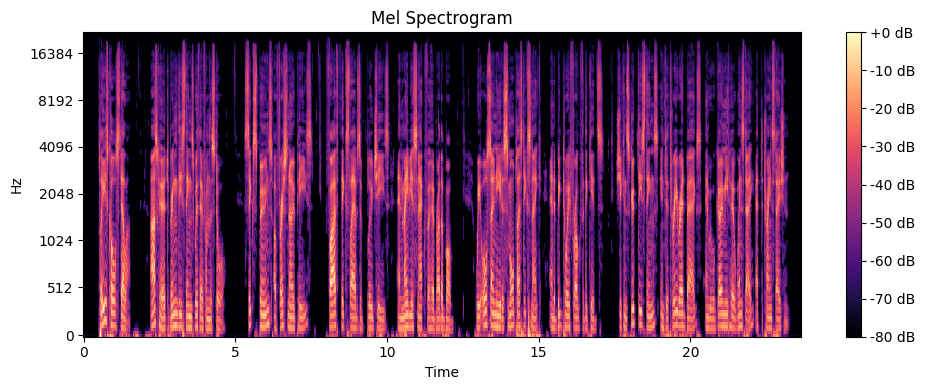

In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

# Set your audio file path
audio_folder = "/content/drive/MyDrive/ASP IEEE project/allaudio"  # or wherever your files are stored
file_name = "english73.wav"
audio_path = os.path.join(audio_folder, file_name)

# Load audio
y, sr = librosa.load(audio_path, sr=None)

# Compute Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibels

# Plot the Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [9]:
#define your folder structure
data_dir = "/content/drive/MyDrive/ASP IEEE project/allaudio"

## Extracting Male Speaker Audio Metadata

In [10]:
import pandas as pd
import re

# Load the CSV file directly (update the file path accordingly)
csv_file = "/content/drive/MyDrive/bio_metadata.csv"  # Change this to your actual CSV file path
df = pd.read_csv(csv_file)

# Check if required columns exist
required_columns = ['language_num', 'sex', 'native_language']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns in CSV: {missing_columns}")
else:
    # Filter rows where sex is "male"
    df_male = df[df['sex'].str.lower() == 'male']

    # Keep only 'language_num' and 'native_language'
    df_male = df_male[['language_num', 'native_language']]

    # Add ".wav" extension to language_num column
    df_male['language_num'] = df_male['language_num'] + ".wav"

    # Remove all brackets [] and text inside them, as well as (cmn)
    df_male['native_language'] = df_male['native_language'].apply(lambda x: re.sub(r'\[.*?\]|\(.*?\)', '', x).strip())

    # Save to a new CSV file in the same directory as the original file
    output_file = csv_file.replace(".csv", "_male_audio.csv")  # Creates a new file with '_male_audio' suffix
    df_male.to_csv(output_file, index=False)

    print(f"Filtered data saved to {output_file}")

Filtered data saved to /content/drive/MyDrive/bio_metadata_male_audio.csv


In [ ]:
import numpy as np
import pandas as pd
# Path to your CSV file
csv_path = "/content/drive/MyDrive/ASP IEEE project/male_data.csv"

# Load CSV
df = pd.read_csv(csv_path)
print(df)  # Check first few rows

       language_num native_language
0     mandarin3.wav        mandarin
1     mandarin7.wav        mandarin
2     mandarin8.wav        mandarin
3     mandarin9.wav        mandarin
4    mandarin10.wav        mandarin
..              ...             ...
508   arabic193.wav          arabic
509   arabic194.wav          arabic
510   arabic196.wav          arabic
511   arabic197.wav          arabic
512   arabic198.wav          arabic

[513 rows x 2 columns]


## Identifying Missing Files with Checkpoints

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Paths
csv_path = '/content/drive/MyDrive/ASP IEEE project/male_data.csv'
audio_dir = "/content/drive/MyDrive/ASP IEEE project/allaudio"
checkpoint_path = '/content/drive/MyDrive/ASP IEEE project/missing_files.txt'

# Load CSV
df = pd.read_csv(csv_path)

# Ensure CSV has the correct column
if "language_num" not in df.columns:
    raise ValueError("CSV must contain a 'language_num' column with filenames.")

# List all audio files in the directory
audio_files = set(os.listdir(audio_dir))

# Load previous checkpoint if exists
missing_files = []
if os.path.exists(checkpoint_path):
    with open(checkpoint_path, 'r') as f:
        missing_files = [line.strip() for line in f.readlines()]
    print(f"Resuming from checkpoint: {len(missing_files)} missing files already found.")

# Identify missing files
print("Checking for missing audio files...")

with open(checkpoint_path, 'a') as f:
    for file in tqdm(df["language_num"], desc="Processing files"):
        if file not in audio_files and file not in missing_files:
            print(f"Missing: {file}")
            missing_files.append(file)
            f.write(file + "\n")

# Final status
if missing_files:
    print(f"\nTotal Missing Files: {len(missing_files)} (saved to {checkpoint_path})")
else:
    print("\nAll audio files are present!")

Resuming from checkpoint: 3 missing files already found.
Checking for missing audio files...


Processing files: 100%|██████████| 513/513 [00:00<00:00, 661444.19it/s]


Total Missing Files: 3 (saved to /content/drive/MyDrive/ASP IEEE project/missing_files.txt)


In [ ]:
print(df["native_language"].value_counts())

native_language
english     347
arabic      110
mandarin     56
Name: count, dtype: int64


## Wav2Vec2 Feature Extraction from Male Audio Data

A self-supervised speech model by Facebook AI.Pretrained on massive unlabeled audio datasets.Learns contextual representations of raw audio — no need for handcrafted features.


No need for MFCCs, spectrograms, or manual preprocessing.
Captures subtle acoustic patterns like pitch, tone, and rhythm — crucial for accent recognition.
Robust to background noise and speaker variations.

Think of this as the model learning "sound patterns" like tones, pitch, energy, etc.These layers learn the context and relationships between different parts of the speech.

 What Are Transformers?
Transformers are a type of deep learning model designed to handle sequential data, like:
Sentences in language (text)
Audio waveforms
They were originally invented for Natural Language Processing (NLP) but are now used in audio (like Wav2Vec2), vision, code, and more!Traditional models like RNNs/LSTMs read one word/sound at a time in order.
But transformers read the entire input at once, allowing parallel processing — way faster and more powerful!

In [25]:
import os
import torch
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2Model

# Load the CSV file (update with actual path)
csv_path = '/content/drive/MyDrive/ASP IEEE project/male_data.csv'
df = pd.read_csv(csv_path)

# Define paths
audio_dir = "/content/drive/MyDrive/ASP IEEE project/allaudio"

# Load Wav2Vec2 model and processor
model_name = "facebook/wav2vec2-base-960h"  # You can try larger models for better performance
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2Model.from_pretrained(model_name)
model.eval()  # Set model to evaluation mode

# Prepare storage for features and labels
data_features = []
labels = []

# Ensure CSV has required columns
if "language_num" not in df.columns or "native_language" not in df.columns:
    raise ValueError("CSV must contain 'language_num' and 'native_language' columns.")

# Convert labels to numerical format
class_names = sorted(df["native_language"].unique())  # Get unique labels
label_to_index = {label: i for i, label in enumerate(class_names)}

print("Processing audio files...")

for index, row in tqdm(df.iterrows(), total=len(df)):
    file_name = row["language_num"]
    file_path = os.path.join(audio_dir, file_name)

    if not os.path.exists(file_path):
        print(f"Missing file: {file_name}")
        continue  # Skip missing files

    try:
        # Load audio file
        audio_data, sample_rate = librosa.load(file_path, sr=16000)  # Wav2Vec expects 16kHz audio

        # Convert to tensor and process
        inputs = processor(audio_data, sampling_rate=16000, return_tensors="pt", padding=True)
        with torch.no_grad():
            outputs = model(**inputs)

        # Extract last hidden state embeddings
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

        # Append data and labels
        data_features.append(embeddings)
        labels.append(label_to_index[row["native_language"]])

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Convert lists to NumPy arrays
data_features = np.array(data_features)
labels = np.array(labels)

# Save processed data for future training
# Define output paths
target_dir = "/content/drive/MyDrive/ASP IEEE project/Wav2vec features"
os.makedirs(target_dir, exist_ok=True)  # Create directory if it doesn't exist

np.save(os.path.join(target_dir, "wav2vec_features.npy"), data_features)
np.save(os.path.join(target_dir, "wav2vec_labels.npy"), labels)

print("Feature extraction complete!")
print("Data shape:", data_features.shape)
print("Labels shape:", labels.shape)

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processing audio files...


100%|██████████| 513/513 [1:25:06<00:00,  9.95s/it]

Feature extraction complete!
Data shape: (513, 768)
Labels shape: (513,)


## OVERSAMPLING AS THERE ARE FEW SAMPLES OF MANDARIN

SMOTE: Synthetic Minority Over-sampling Technique
It’s a data augmentation technique used to balance imbalanced datasets.
SMOTE helps by creating synthetic examples of the minority class — not just copying them.
Interpolates between the sample and its neighbors to create new, slightly different synthetic data points.
It’s like saying: “Let’s generate new voices that are similar to existing Mandarin samples but not exact duplicates.”



In [27]:
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

# Ensure lists are converted to NumPy arrays
X = np.array(data_features)
y = np.array(labels)

# Ensure labels are integers and 1D

print("Shape of features (X):", X.shape)  # Confirm shape
print("Shape of labels (y):", y.shape)    # Confirm shape

# Check class distribution before SMOTE
#print("Before SMOTE class distribution:", Counter(y))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#print("After SMOTE class distribution:", Counter(y_resampled))

# Save the balanced dataset
# Save processed data for future training
# Define output paths
target_dir = "/content/drive/MyDrive/ASP IEEE project/Wav2vec features"
os.makedirs(target_dir, exist_ok=True)  # Create directory if it doesn't exist

# Correctly specify file paths
features_path = os.path.join(target_dir, "wav2vec_features_balanced.npy")
labels_path = os.path.join(target_dir, "wav2vec_labels_balanced.npy")

# Save the files
np.save(features_path, X_resampled)
np.save(labels_path, y_resampled)

print("Balanced dataset saved successfully!")
print(y_resampled.shape)

Shape of features (X): (513, 768)
Shape of labels (y): (513,)
Balanced dataset saved successfully!
(1041,)
Shape of features (X): (513, 768)
Shape of labels (y): (513,)
Balanced dataset saved successfully!
(1041,)


In [28]:
print("Type of X:", type(data_features))
print("Shape of X:", np.array(data_features).shape)

print("Type of y:", type(labels))
print("Shape of y:", np.array(labels).shape)

print("Unique labels in y:", np.unique(labels))# Summary of processing
print("\n=== Processing Summary ===")
print(f"Total files in CSV: {len(df)}")
print(f"Successfully processed: {len(X_resampled)}")

# Print data shape
print("\n=== Data Shapes ===")
print("DATA Features Shape:", X_resampled.shape)  # (num_samples, n_mfcc, max_pad_length)
#print("Labels Shape:", labels.shape)

Type of X: <class 'numpy.ndarray'>
Shape of X: (513, 768)
Type of y: <class 'numpy.ndarray'>
Shape of y: (513,)
Unique labels in y: [0 1 2]

=== Processing Summary ===
Total files in CSV: 513
Successfully processed: 1041

=== Data Shapes ===
DATA Features Shape: (1041, 768)


In [29]:
X_resampled= X_resampled.reshape(X_resampled.shape[0], -1)

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (832, 768), (832,)
Test shape: (209, 768), (209,)


## CREATING THE MODEL

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [32]:
model2=Sequential()
###first layer
model2.add(Dense(100,input_shape=(768,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
###second layer
model2.add(Dense(200))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
###third layer
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
###fourth layer
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
###final layer
model2.add(Dense(3))
model2.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          76,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             303 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,603 (498.45 KB)

 Trainable params: 127,603 (498.45 KB)

 Non-trainable params: 0 (0.00 B)

## TRAINING THE MODEL

Dropout:Dropout is a regularization technique used to prevent overfitting.During training, random neurons in your network are "turned off" (i.e., dropped) in each iteration.
This forces the network to not rely too heavily on any one feature, and instead learn robust, generalized patterns.

Epochs: One epoch means the model has seen every training sample once.But too many epochs? It might overfit (memorize the training data).

In [34]:
import numpy as np
from keras import backend as K
import tensorflow as tf

# Ensure consistent data types (convert to float32)
X_resampled = X_resampled.astype('float32')
y_resampled = y_resampled.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Clear any previous TensorFlow session (prevents graph errors)
K.clear_session()
tf.compat.v1.reset_default_graph()

# Check data shapes and types
print(f"X_resampled shape: {X_resampled.shape}, dtype: {X_resampled.dtype}")
print(f"y_resampled shape: {y_resampled.shape}, dtype: {y_resampled.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")

# Ensure correct loss function based on label shape
loss_function = "categorical_crossentropy" if y_resampled.ndim == 2 else "sparse_categorical_crossentropy"

# Compile the model
model2.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

# Train the model with oversampled data
num_epochs = 100
num_batch_size = 32

history = model2.fit(
    X_resampled, y_resampled,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

X_resampled shape: (1041, 768), dtype: float32
y_resampled shape: (1041,), dtype: float32
X_test shape: (209, 768), dtype: float32
y_test shape: (209,), dtype: float32
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.3320 - loss: 1.1254 - val_accuracy: 0.3493 - val_loss: 1.0898
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3518 - loss: 1.1027 - val_accuracy: 0.6459 - val_loss: 1.0827
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3763 - loss: 1.0892 - val_accuracy: 0.6794 - val_loss: 1.0260
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5000 - loss: 1.0178 - val_accuracy: 0.6124 - val_loss: 0.8228
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5278 - loss: 0.8911 - val_accuracy: 0.6411 - val_loss: 0.7079
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6217 - loss: 0.8003 - val_accuracy: 0.5981 - val_loss: 0.7151
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 

## SAVING THE MODEL

In [35]:
model2.save('my_model_oversampled2.h5')
new_model = tf.keras.models.load_model('my_model_oversampled2.h5')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          76,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             303 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,605 (498.46 KB)

 Trainable params: 127,603 (498.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [36]:
from google.colab import files
files.download('my_model_oversampled2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import tensorflow as tf

## LOADING THE PRETRAINED MODEL

In [3]:
# Load your pretrained accent classifier model
model = tf.keras.models.load_model('/content/my_model_oversampled2.h5')
print("Pretrained model loaded successfully!")

Pretrained model loaded successfully!


In [8]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the trained model

# Load your data
X_test = np.load('/content/drive/MyDrive/ASP IEEE project/Wav2vec features/wav2vec_features_balanced.npy')  # features
y_test = np.load('/content/drive/MyDrive/ASP IEEE project/Wav2vec features/wav2vec_labels_balanced.npy')  # labels (should be one-hot encoded if model uses categorical_crossentropy)

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Get predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Compare directly to label vector
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.41%


## CONFUSION MATRIX

              precision    recall  f1-score   support

      Arabic       0.90      0.94      0.92       347
     English       0.90      1.00      0.95       347
    Mandarin       0.99      0.83      0.90       347

    accuracy                           0.92      1041
   macro avg       0.93      0.92      0.92      1041
weighted avg       0.93      0.92      0.92      1041



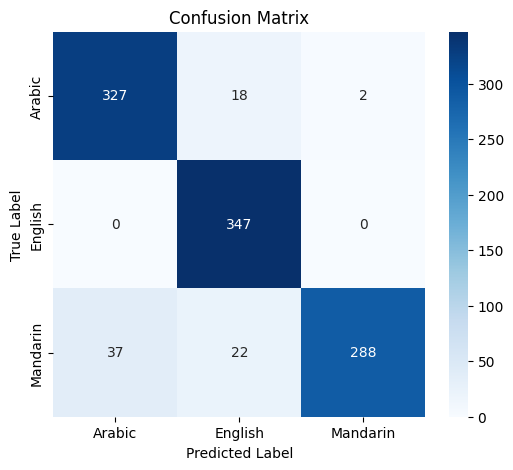

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model = load_model("/content/my_model_oversampled2.h5")  # Update path as needed

# Step 2: Load your test data (update path as needed)
X_test = np.load("/content/drive/MyDrive/ASP IEEE project/Wav2vec features/wav2vec_features_balanced.npy")
y_test = np.load("/content/drive/MyDrive/ASP IEEE project/Wav2vec features/wav2vec_labels_balanced.npy")

# Your test labels are already integers
y_true = y_test  # No need for argmax

# Get predicted class from probabilities
y_pred = np.argmax(y_pred_probs, axis=1)

# Print precision, recall, f1-score
print(classification_report(y_true, y_pred, target_names=["Arabic", "English", "Mandarin"]))
# Step 1: Load your trained model
# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Arabic", "English", "Mandarin"],  # Change if needed
            yticklabels=["Arabic", "English", "Mandarin"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## ROC Curve:Receiver Operating Characteristic curve
It helps you see how confidently your model can distinguish one accent from the others.
A better model hugs the top-left corner of the plot.
The area under the ROC curve gives you a single number to compare:
AUC(area under curve) = 1.0 → Perfect classifier
AUC = 0.5 → Random guessing

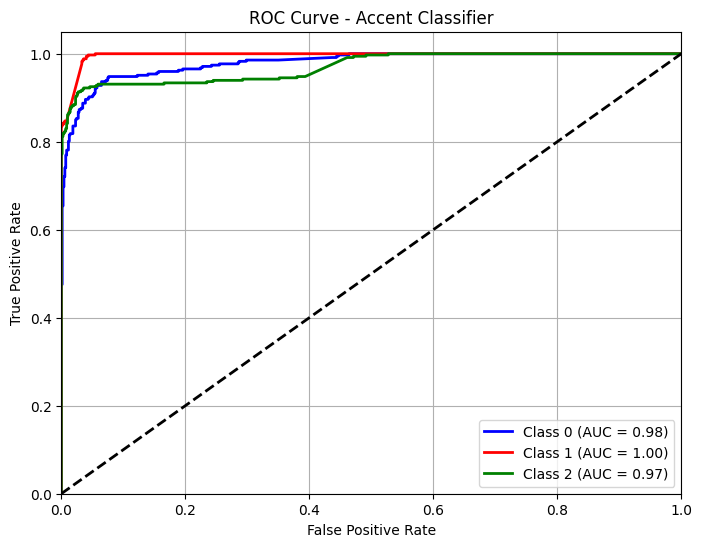

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Labels and predicted probabilities
# y_test: (n_samples,) with integer class labels
# y_pred_probs: (n_samples, n_classes) with predicted probabilities

# Get number of classes
n_classes = y_pred_probs.shape[1]

# One-hot encode y_test
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['blue', 'red', 'green', 'purple'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Accent Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      arabic       0.90      0.94      0.92       347
     english       0.90      1.00      0.95       347
    mandarin       0.99      0.83      0.90       347

    accuracy                           0.92      1041
   macro avg       0.93      0.92      0.92      1041
weighted avg       0.93      0.92      0.92      1041



<Axes: >

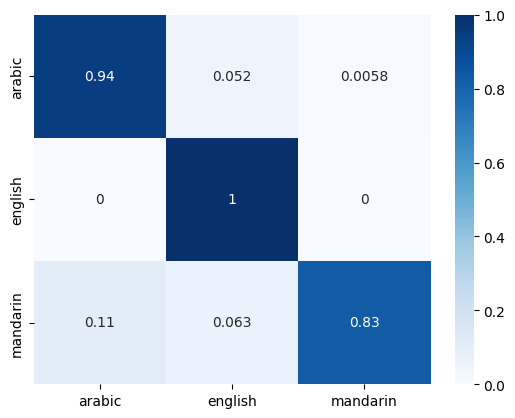

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

## t-SNE
stands for t-distributed Stochastic Neighbor Embedding.
It’s a dimensionality reduction technique used to visualize high-dimensional data.
Wav2Vec2 model creates 768-dimensional feature vectors per audio file.WHich is too big to plot or understand visually.
t-SNE shrinks it down to 2D or 3D while keeping similar accents close together and different ones far apart.

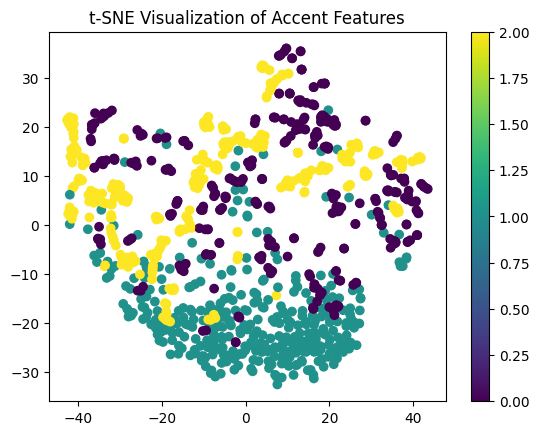

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2).fit_transform(X_resampled)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_resampled, cmap='viridis')
plt.title("t-SNE Visualization of Accent Features")
plt.colorbar()
plt.show()

In [5]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00


In [8]:
import gradio as gr
import numpy as np
import torch
import librosa
from tensorflow.keras.models import load_model
from transformers import Wav2Vec2Processor, Wav2Vec2Model

# Load the pretrained Keras model (.h5)
accent_model = load_model("/content/my_model_oversampled2.h5")

# Load Wav2Vec processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Label mapping (update with your class labels)
accent_labels = ['Arabic', 'English', 'Mandarin']

# Preprocess audio using Wav2Vec pipeline
def preprocess_audio_wav2vec(audio_path):
    # Load and resample audio to 16kHz
    audio_data, sample_rate = librosa.load(audio_path, sr=16000)

    # Convert audio to tensor (required for Wav2Vec)
    inputs = processor(audio_data, sampling_rate=16000, return_tensors="pt", padding=True)

    # Extract Wav2Vec embeddings
    with torch.no_grad():
        outputs = wav2vec_model(**inputs)

    # Get mean-pooled embeddings (shape: [1, 768])
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Ensure shape matches the model input
    return np.expand_dims(embeddings, axis=0)

# Prediction function for Gradio
def classify_accent(audio):
    # Save the audio file temporarily
    audio_path = audio

    try:
        # Preprocess audio to get Wav2Vec embeddings
        input_data = preprocess_audio_wav2vec(audio_path)

        # Predict using the accent model
        prediction = accent_model.predict(input_data)

        # Determine the predicted accent and confidence
        predicted_accent = accent_labels[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        return f" Predicted Accent: {predicted_accent} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error processing audio: {str(e)}"

# Gradio interface
interface = gr.Interface(
    fn=classify_accent,
    inputs=gr.Audio(type="filepath"),
    outputs="text",
    title="Accent Classifier",
    description="Upload an audio file (.wav) to classify its accent [English,Arabic,Mandarin]"
)

interface.launch()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://15001783be14dc4828.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
